In [1]:
# go get the library to read
!pip install segyio

    100% |████████████████████████████████| 92kB 1.0MB/s ta 0:00:01
    100% |████████████████████████████████| 4.7MB 272kB/s ta 0:00:01
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [10]:
from os import path
import matplotlib.pylab as plt
import numpy as np

In [11]:
DATAPATH = path.expanduser("~/Downloads")

In [13]:
import segyio
import numpy as np

with segyio.open(path.join(DATAPATH,"psdn11_TbsdmF_Far_Nov_11_32bit.segy")) as fp:
    # looks like it guesses inline/xline correctly
    print (fp.ilines)
    print (fp.xlines)
    

[ 983  984  985 ..., 4417 4418 4419]
[ 504  505  506 ..., 5554 5555 5556]


In [17]:
with segyio.open(path.join(DATAPATH,"psdn11_TbsdmF_Far_Nov_11_32bit.segy")) as fp:
    iline = fp.iline[2500]

In [18]:
#
prctl_rng = np.percentile(iline, 80) - np.percentile(iline, 20)
iline /= prctl_rng

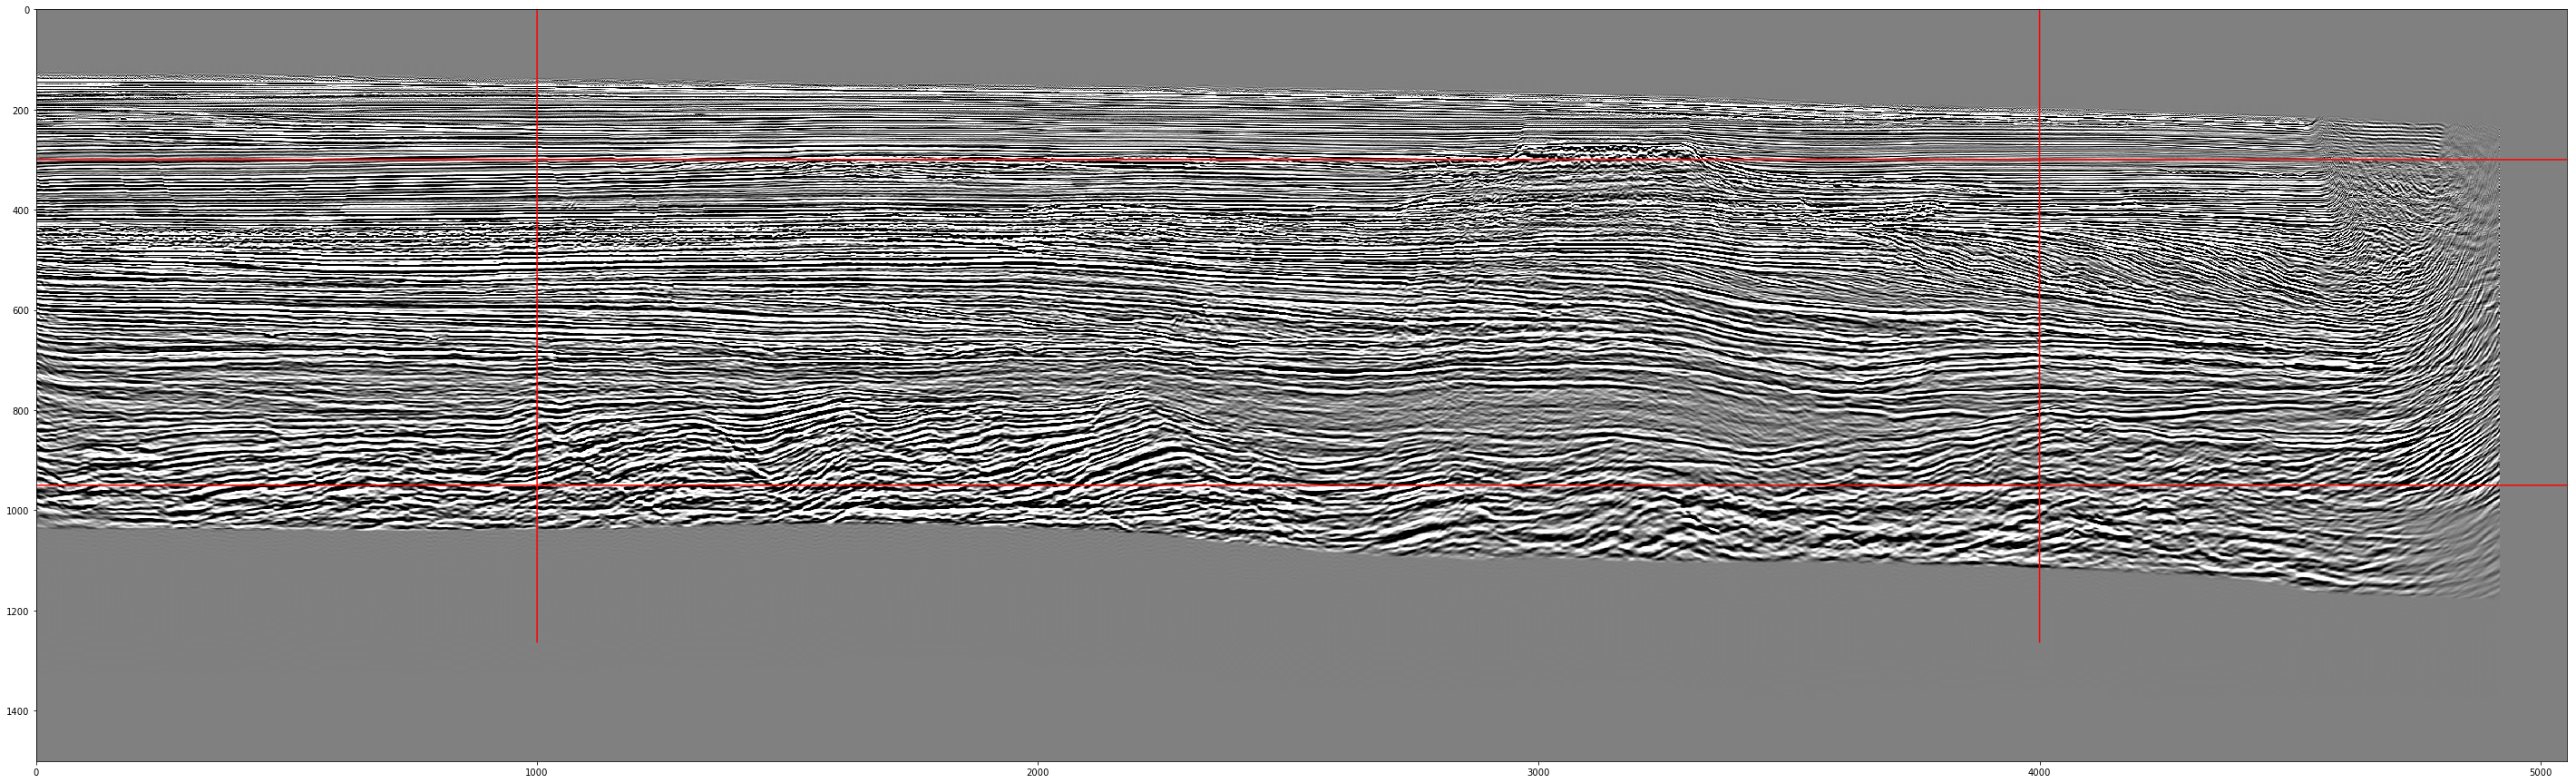

In [19]:
fig = plt.figure(figsize=(50,25))
plt.imshow(iline.T, cmap='gray', vmin=-1, vmax=1)
plt.plot(np.ones(iline.shape[0])*300 ,'-r')
plt.plot(np.ones(iline.shape[0])*950 ,'-r')

plt.plot(np.ones(iline.shape[0])*1000, np.arange(0, iline.shape[0])/4, '-r')
plt.plot(np.ones(iline.shape[0])*4000, np.arange(0, iline.shape[0])/4,'-r')

plt.show()

In [20]:
iline = iline[1000:4000, 300:950]

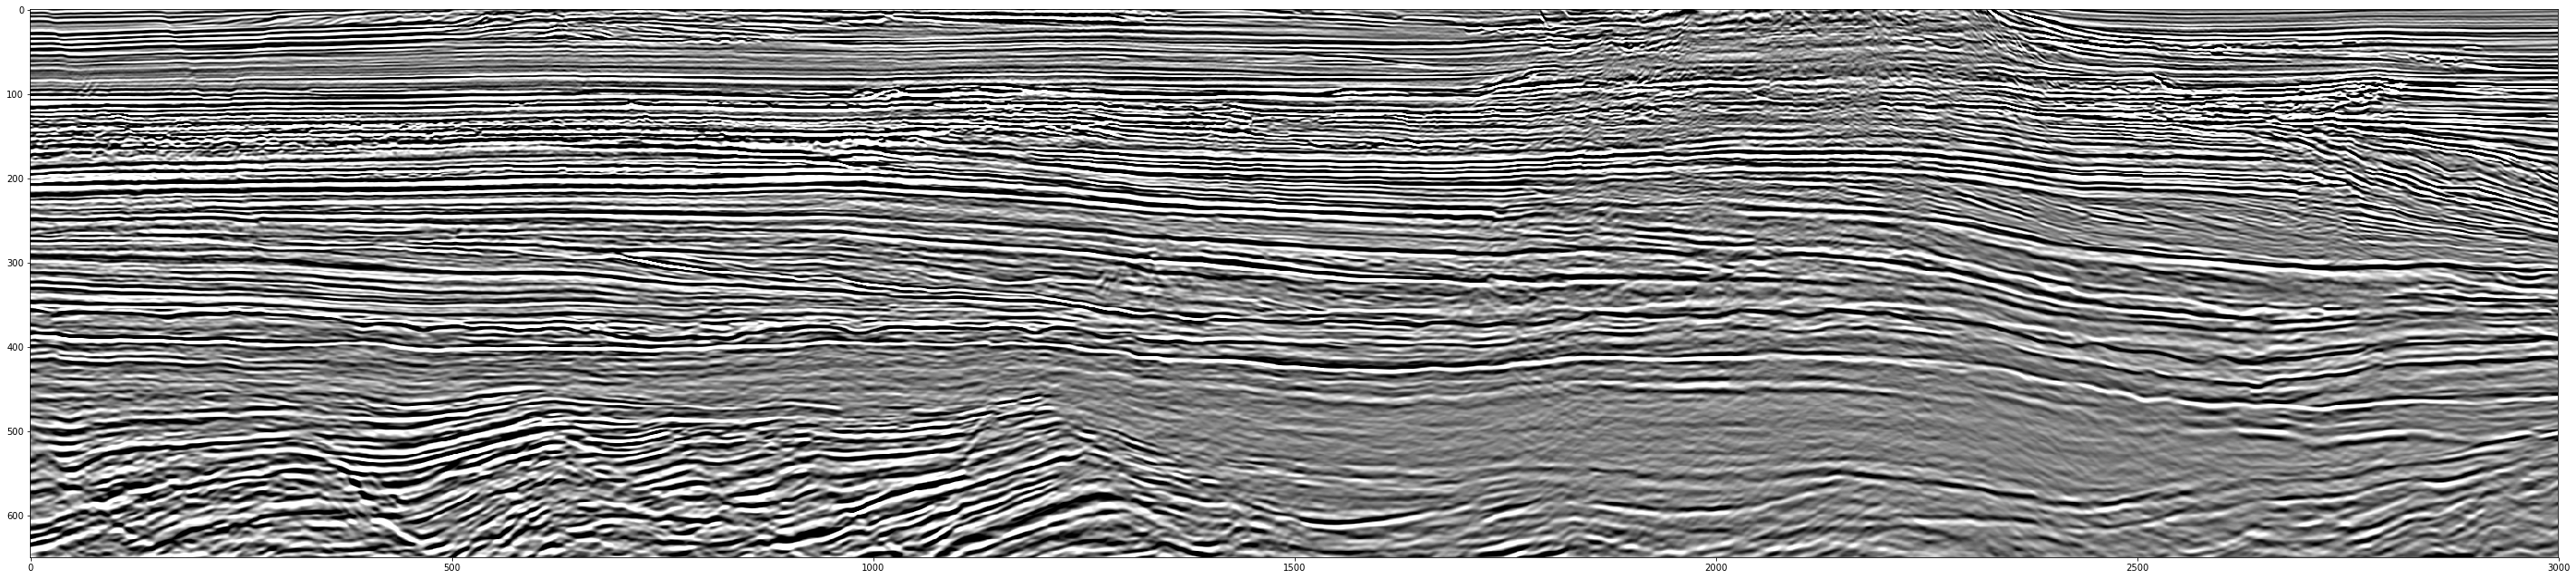

In [21]:
fig = plt.figure(figsize=(50,25))
plt.imshow(iline.T, cmap='gray', vmin=-2, vmax=2)
plt.show()